In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('hypothyroid.csv')
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [4]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
for column in data.columns:
    print(data[column].value_counts())

59     95
60     91
70     90
55     81
73     81
       ..
10      1
455     1
5       1
?       1
4       1
Name: age, Length: 94, dtype: int64
F    2480
M    1142
?     150
Name: sex, dtype: int64
f    3308
t     464
Name: on_thyroxine, dtype: int64
f    3722
t      50
Name: query_on_thyroxine, dtype: int64
f    3729
t      43
Name: on_antithyroid_medication, dtype: int64
f    3625
t     147
Name: sick, dtype: int64
f    3719
t      53
Name: pregnant, dtype: int64
f    3719
t      53
Name: thyroid_surgery, dtype: int64
f    3713
t      59
Name: I131_treatment, dtype: int64
f    3538
t     234
Name: query_hypothyroid, dtype: int64
f    3535
t     237
Name: query_hyperthyroid, dtype: int64
f    3754
t      18
Name: lithium, dtype: int64
f    3738
t      34
Name: goitre, dtype: int64
f    3676
t      96
Name: tumor, dtype: int64
f    3771
t       1
Name: hypopituitary, dtype: int64
f    3588
t     184
Name: psych, dtype: int64
t    3403
f     369
Name: TSH_measured, dtype: int64
?     

In [7]:
for column in data.columns:
    count = data[column][data[column] == '?'].count()
    if count != 0:
        print(column, count)

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [8]:
data.shape

(3772, 30)

In [9]:
data.drop(['TBG'], axis=1, inplace=True)

In [10]:
data.shape

(3772, 29)

In [11]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,SVI,negative


In [12]:
data.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured'], axis=1, inplace=True)

In [13]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.1,2,102,?,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,?,109,0.91,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175,?,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,f,SVI,negative


In [14]:
data['sex'] == 'F'

0        True
1        True
2       False
3        True
4        True
        ...  
3767     True
3768     True
3769     True
3770    False
3771     True
Name: sex, Length: 3772, dtype: bool

In [15]:
for column in data.columns:
    count = data[column][data[column] == '?'].count()
#     print(count)
    if count != 0:
        data[column] = data[column].replace('?', np.nan)

In [16]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count == 0:
        print(column, data[column][data[column]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
TBG_measured 0
referral_source 0
Class 0


In [17]:
data.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
TBG_measured                   0
referral_source                0
Class                          0
dtype: int64

In [18]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.1,2,102,NaN,NaN,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109,0.91,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175,NaN,NaN,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,f,SVI,negative


In [19]:
for column in data.columns:
    if len(data[column].unique()) == 2:
        data[column] = pd.get_dummies(data[column], drop_first=True)

In [20]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG_measured,referral_source,Class
0,41,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,f,SVHC,negative
1,23,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,f,other,negative
2,46,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,f,other,negative
3,70,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,f,other,negative
4,70,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,f,SVI,negative


In [21]:
data['pregnant'].value_counts()

0    3719
1      53
Name: pregnant, dtype: int64

In [22]:
data['TBG_measured'].value_counts()

f    3772
Name: TBG_measured, dtype: int64

In [23]:
data.drop(['TBG_measured'], axis=1, inplace=True)

In [24]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [25]:
data['sex'] = data['sex'].map({'F':0, 'M':1})

In [26]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [27]:
data['referral_source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral_source, dtype: int64

In [31]:
referral_source = pd.get_dummies(data['referral_source'], drop_first=True)

In [32]:
data = pd.concat([data, referral_source], axis=1)

In [33]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class,SVHC,SVHD,SVI,other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,negative,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,negative,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,negative,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,negative,0,0,1,0


In [34]:
data.drop(['referral_source'], axis=1, inplace=True)

In [35]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,SVHC,SVHD,SVI,other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,negative,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,negative,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,negative,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,negative,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,negative,0,0,1,0


In [37]:
data.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
Class                          0
SVHC                           0
SVHD                           0
SVI                            0
other                          0
dtype: int64

In [42]:
data['age'].fillna(data['age'].mode()[0], inplace=True)

In [43]:
data['age'].isnull().sum()

0

In [61]:
data['TSH'] = data['TSH'].astype(float)
data['T3'] = data['T3'].astype(float)
data['TT4'] = data['TT4'].astype(float)
data['T4U'] = data['T4U'].astype(float)
data['FTI'] = data['FTI'].astype(float)

In [66]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])
data['TSH'] = data['TSH'].fillna(data['TSH'].mean())
data['T3'] = data['T3'].fillna(data['T3'].mean())
data['TT4'] = data['TT4'].fillna(data['TT4'].mean())
data['T4U'] = data['T4U'].fillna(data['T4U'].mean())
data['FTI'] = data['FTI'].fillna(data['FTI'].mean())

In [67]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
SVHC                         0
SVHD                         0
SVI                          0
other                        0
dtype: int64

In [71]:
data['age'] = data['age'].astype(int)

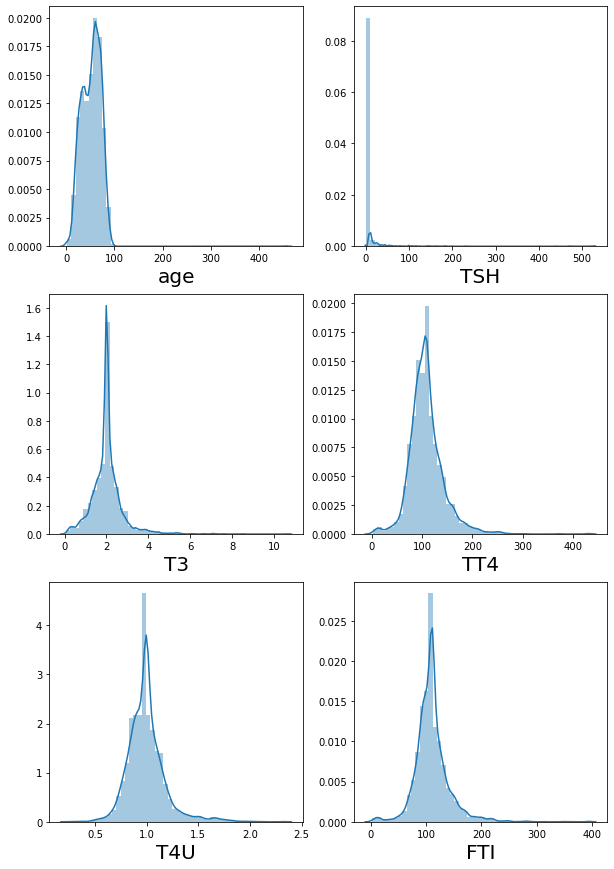

In [83]:
columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

plt.figure(figsize=(10,15))

plotnumber = 1
for column in columns:
    plt.subplot(3,2,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize=20)
    plotnumber += 1

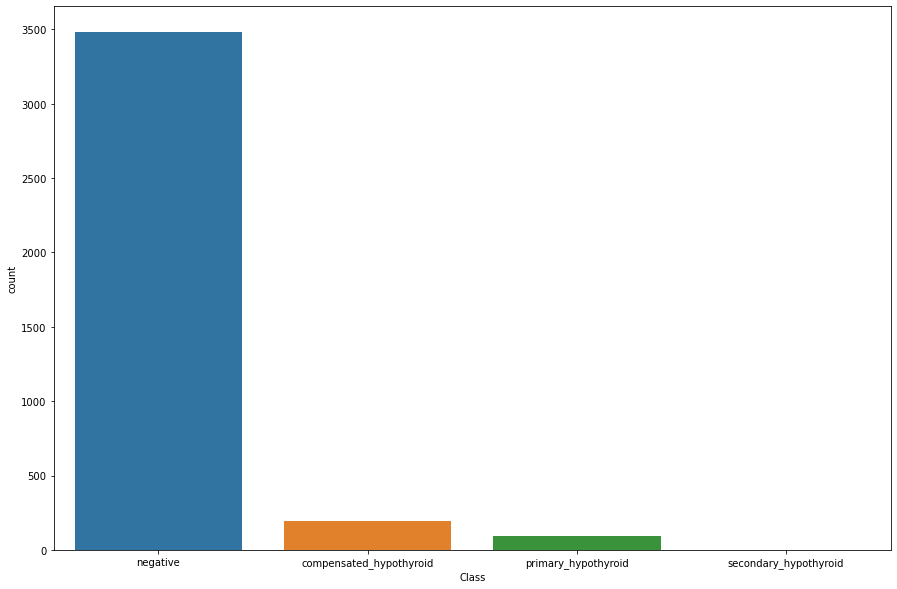

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(data['Class'])

In [87]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,SVHC,SVHD,SVI,other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5000,125.0,1.140,109.000000,negative,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0000,102.0,0.995,110.469649,negative,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0135,109.0,0.910,120.000000,negative,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9000,175.0,0.995,110.469649,negative,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2000,61.0,0.870,70.000000,negative,0,0,1,0


In [88]:
x = data.drop('Class', axis=1)
y = data['Class']

In [89]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,SVHC,SVHD,SVI,other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5000,125.0,1.140,109.000000,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0000,102.0,0.995,110.469649,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0135,109.0,0.910,120.000000,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9000,175.0,0.995,110.469649,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2000,61.0,0.870,70.000000,0,0,1,0


In [90]:
y.head()

0    negative
1    negative
2    negative
3    negative
4    negative
Name: Class, dtype: object

In [93]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [94]:
x_scaled

array([[-0.53475174, -0.65895412, -0.37452106, ..., -0.10221233,
        -0.61453065, -1.18364626],
       [-1.43116692, -0.65895412, -0.37452106, ..., -0.10221233,
        -0.61453065,  0.84484701],
       [-0.28574752,  1.51755634, -0.37452106, ..., -0.10221233,
        -0.61453065,  0.84484701],
       ...,
       [ 1.1086761 , -0.65895412, -0.37452106, ..., -0.10221233,
        -0.61453065,  0.84484701],
       [ 1.00907441,  1.51755634, -0.37452106, ..., -0.10221233,
         1.62725814, -1.18364626],
       [ 0.61066766, -0.65895412, -0.37452106, ..., -0.10221233,
        -0.61453065,  0.84484701]])

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [99]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_train)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
accuracy

1.0

In [104]:
y_pred_t = model.predict(x_test)
predictions1 = [value for value in y_pred_t]
accuracy = accuracy_score(y_test, predictions1)
accuracy

0.9973498233215548

In [106]:
x_test[0]

array([-1.28176439, -0.65895412, -0.37452106, -0.11590357, -0.10738362,
       -0.20137459, -0.11937815, -0.11937815, -0.126056  , -0.25717516,
       -0.25892827, -0.06924511, -0.09537176, -0.16160242, -0.0162844 ,
       -0.22645541, -0.12825473,  0.25265405, -0.3861582 ,  0.02700937,
       -0.49343507, -0.33763711, -0.10221233, -0.61453065,  0.84484701])

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {
    'learning_rate': [1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators': [10,50,100,200]
}

In [109]:
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

In [110]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Icon\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.6min finished


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tree

In [111]:
grid.best_params_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}

In [112]:
model1 = XGBClassifier(learning_rate=1,
                      max_depth=5,
                      n_estimators=50)

In [113]:
model1.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
x_test[0]

array([-1.28176439, -0.65895412, -0.37452106, -0.11590357, -0.10738362,
       -0.20137459, -0.11937815, -0.11937815, -0.126056  , -0.25717516,
       -0.25892827, -0.06924511, -0.09537176, -0.16160242, -0.0162844 ,
       -0.22645541, -0.12825473,  0.25265405, -0.3861582 ,  0.02700937,
       -0.49343507, -0.33763711, -0.10221233, -0.61453065,  0.84484701])

In [123]:
model1.predict(scaler.transform([[-1.28176439, -0.65895412, -0.37452106, -0.11590357, -0.10738362,
       -0.20137459, -0.11937815, -0.11937815, -0.126056  , -0.25717516,
       -0.25892827, -0.06924511, -0.09537176, -0.16160242, -0.0162844 ,
       -0.22645541, -0.12825473,  0.25265405, -0.3861582 ,  0.02700937,
       -0.49343507, -0.33763711, -0.10221233, -0.61453065,  0.84484701]]))

array(['negative'], dtype=object)

In [118]:
data.shape

(3772, 26)

In [119]:
x.shape

(3772, 25)

In [124]:
import pickle

with open('scaled_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('xgboostThyroid.pkl', 'wb') as f:
    pickle.dump(model1, f)